In [37]:
#Importing all the required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound as play

#%matplotlib inline

In [60]:
# This is the algorithm for computing DTFT of given signal
# The parameters for this Algorithm is a signal of shape (2, N) or  (N, )
# it has some default parameters like lower limit, higher limit and Number of points for omega axis

def dtft(signal, low_lim=-1*np.pi, high_lim=np.pi, N=100, endpoints=False):
    w = np.linspace(low_lim, high_lim, N, endpoint=endpoints)                  #Array of omega values
    e_jw = np.exp(w*1j)                                                    #computes e^{jw}
    
    # Creates a dictnationry to store dtft, Magnitude, Phase and omega
    dtft = dict()        
    # Creates a empty array for dtft
    dtft['complex'] = np.zeros(N, dtype=complex) 
    # Assiging omega values 
    dtft['omega'] = w
    
    # The following conditional statements are for checking whether the input(signal) is been provided with 
    # time stamps
    if signal.shape[0] == 2:
        for i in range(signal.shape[1]):
            dtft['complex'] += signal[0, i]*np.power(e_jw, -1*signal[1, i])
    else:
        for i in range(signal.shape[0]):
            dtft['complex'] += signal[i]*np.power(e_jw, -1*i)

    # Rounds-off the result upto 4 decimal places
    dtft['complex'] = np.round(dtft['complex'], decimals=4)
    # Finds the magnitude of the dtft computed above.
    dtft['magnitude'] = np.absolute(dtft['complex'])
    # Finds the phase of dtft in radians which lies in the range[-pi, pi]
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft


# This below function flips the w axis 
# Input:- X(e^jw) 
# Output:- X(e^-jw)
def negate_dtft(dtft):
    dtft['complex'] = np.flip(dtft['complex'])
    dtft['magnitude'] = np.absolute(dtft['complex'])
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft

# This below function finds the conjugate of dtft.
# Input:- X(e^jw) 
# Output:- X*(e^jw)
def conjugate(dtft):
    dtft['complex'] = np.conj(dtft['complex']) 
    dtft['phase'] = -1*dtft['phase']
    return dtft

# This function is used for plotting Real part, Imaginary part, Magnitude and Phase for a given DTFT

def dtft_plotter(dtft, title=None, complex_part=True):
    plt.rcParams['figure.figsize'] = [10, 8] #Setting the plotting area
    
    if complex_part:                         #For complex signals
        fig, ax = plt.subplots(2,2)

        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        #Plotting the real part
        ax[0, 0].title.set_text('Real Part')
        ax[0, 0].stem(dtft['omega'], np.real(dtft['complex']))
        ax[0, 0].set(ylabel='$Re\{X(e^{j \omega})\}$')
        #Plotting the Imaginary part
        ax[0, 1].title.set_text('Imaginary Part')
        ax[0, 1].stem(dtft['omega'], np.imag(dtft['complex']), 'tab:red')
        ax[0, 1].yaxis.tick_right()
        ax[0, 1].set(ylabel='$Im\{X(e^{j \omega})\}$')
        #Plotting the Magnitude of DTFT
        ax[1, 0].title.set_text('Magnitude')
        ax[1, 0].stem(dtft['omega'], dtft['magnitude'], 'tab:orange')
        ax[1, 0].set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')
        #Plotting the Phase of DTFT
        ax[1, 1].title.set_text('Phase')
        ax[1, 1].stem(dtft['omega'], dtft['phase'], 'tab:green')
        ax[1, 1].yaxis.tick_right()        
        ax[1, 1].set(ylabel='$\phi$')
    else:                                   #For Real signal
        #Plotting the Magnitude of DTFT
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.stem(dtft['omega'],dtft['magnitude'])
        ax1.set(xlabel='$\omega$', ylabel='$X(e^{j \omega})$')
        ax1.title.set_text('Magnitude')
        #Plotting the Phase of DTFT
        ax2.stem(dtft['omega'],dtft['phase'], 'tab:green')
        ax2.plot(xlabel = 'n', ylabel=r'$\phi$')
        ax2.title.set_text('Phase')

        #This below function will take a file as .wav audio file as input and that verbose default parameter which will
#helpful for printing Specifications of audio file such as #frames, framerate, duration, etc.
#Output of this function will return audio signal array, time duration and Number of frames

def wavfile_to_nparray(FILE, verbose=0, time_len=None, normalise=False):
    audio_file = wave.open(FILE, 'rb')             #Opening the .wav file
    params = audio_file.getparams()                #Getting parameters of the audio file
    fr = params[2]
    if time_len != None:
        nframes = int(time_len*fr)
    else:
        nframes = params[3]
    audio_frame = audio_file.readframes(nframes)        #Reading all frames of the audio file 
    audio = np.zeros(nframes)                    #Creating an empty array for storing the values
    
    # Since the frames are3 being stores as bytes format each value will be a size of 1Byte(*bits)
    # Thus we get values ranging from 0 to 255
    # To avoid large values of dtft magnitude so we are normalizing signal from -1 to 1 
    # the audio signal to have better representation in time domain
    
    for i in range(len(audio_frame)):              
        audio[i] = audio_frame[i]                  #Storing the byte value in int array

    duration = nframes/fr                 #Time duration of the signal
    #Normalising the wave amplitude
    if normalise:
        audio = audio/2**7 - 1
    #Printing all the parameters of the wave
    if verbose:
        print('Channels=',params[0], ', SampleWidth=', params[1],'\bbytes' 
              ,', Framerate=', fr, '\bHz', ', Frames=', nframes, '\nDuration:', time_len if time_len else 
              duration, '\bs\n')
    return audio, duration, nframes, fr

#This below function will Plot the Time signal. Computes DTFT and also plots Magnitude and phase

def analyise_wav_file(file, normalise, time_len=None, verbose=0):
    #Reading the wave file, and converting to array
    audio, t, frames, _ = wavfile_to_nparray(file, verbose=verbose, time_len=time_len, normalise=normalise)
    time = np.linspace(0, t, frames)          #Time scale
    
    dtft_audio = dtft(audio, N=100)           #Finding the DTFT of the wave file
    
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    
    plt.figure()                                            #Plotting Time signal
    plt.title(file, fontsize='large', fontweight='bold')
    plt.plot(time, audio, color='green')

#                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of "+file)
    ax1.title.set_text('Magnitude')
    ax1.stem(dtft_audio['omega'], dtft_audio['magnitude'])
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(dtft_audio['omega'], dtft_audio['phase'], 'tab:red')


#Function for doing convolution
#Method adopted : Shift and Overlap; Moving window-h
def convolve(x, h, plot=True):
    if(x.ndim != 2 and h.ndim != 2):
        n  =  x.shape[0]#Finding the length of the x input
        m = h.shape[0]#Finding the length of the impulse function

        h = np.flip(h)#Flipping the impulse response
        pads = np.zeros(m-1)#Padding for the input array for calculation purpose
        x =  np.hstack((pads, x, pads))#Padding the input signal at the start and end
        return np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])#Summing the overlapped region
    
    if(x.ndim != 2):
        x = np.vstack((x, np.arange(len(x)).astype(np.int)))
    if(h.ndim != 2):
        h = np.vstack((h, np.arange(len(h)).astype(np.int)))

    x_n_max = int(np.max(x[1, :]))
    x_n_min = int(np.min(x[1, :]))
    h_n_max = int(np.max(h[1, :]))
    h_n_min = int(np.min(h[1, :]))
    
    n_r = np.concatenate((x[1, :], h[1, :]))
    mi = np.min(n_r)
    ma = np.max(n_r)

    y_n_r = np.arange(h_n_min + x_n_min, h_n_max + x_n_max+1)

    y = np.zeros(len(y_n_r), dtype=np.complex)
    for n, y_n_r_i in np.ndenumerate(y_n_r):
        s = 0
        for k in x[1, :]:
            if((np.isin(h[1, :], int(y_n_r_i-k))).any()):
                s += x[0, np.argwhere(x[1, :] == int(k))]*(h[0, np.argwhere(h[1, :] == int(y_n_r_i-k))])
        y[n] = s
    y = np.vstack((y, y_n_r))

    #Plot
    if plot:

        plt.rcParams['figure.figsize'] = [10, 4]#Setting the plot area
        plt.rc('axes', labelsize=12)#Setting the label siz
        #Plot of Input sequence
        fig, (ax1,ax2) = plt.subplots(1, 2)
        ax1.stem(x[1, :], x[0, :])
        #Plot of impulse response
        ax1.set(xlabel='n', ylabel='x[n]')
        ax2.stem(h[1, :], h[0, :])
        ax2.set(xlabel='n', ylabel='h[n]')
        #Plot of output sequence
        plt.figure()
        plt.stem(y[1, :], y[0, :])
        plt.xlabel('n')
        plt.ylabel('y[n]')
    
    return y

#Function which convolves the data from a wave file and creates a new wave file with
#data resulting from the convolution of original signals data and given impulse response
def audio_convolve(i, h, normalisation, o, time_len=None):
    #Reading and extracting data from the original signal  
    x, t, nframes, fr = wavfile_to_nparray(i, time_len=time_len, normalise=normalisation)   
    print(x.shape, h.shape)
    
    #Creating the newfile
    y_file = o
    y_filep = wave.open(y_file, 'wb')
    
    #Setting the wave file parameters
    y_filep.setnchannels(1)
    y_filep.setsampwidth(1)
    y_filep.setframerate(fr)
    
    #Finding the convolution data 

    if(h.ndim == 2):
        x = np.hstack((np.zeros(np.sum(h[1, :] < 0)), x))
        h = np.flip(h[0, :])#Flipping the impulse response
    else:
        h = np.flip(h)#Flipping the impulse response
    n  =  x.shape[0]#Finding the length of the x input
    m = h.shape[0]#Finding the length of the impulse function
    
    pads = np.zeros(m-1)#Padding for the input array for calculation purpose
    x =  np.hstack((pads, x, pads))#Padding the input signal at the start and end
    y =  np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])#Summing the overlapped region
    
    #Normalising the data 
    if normalisation:
        y = np.clip(y, -1, 1)
        y = (y+1)*(2**7)
    else:
        y = np.clip(y, 0, 255)
    #Converting the byte code to nparray
    y = y.astype(np.uint8)
    y = y.tobytes()
    y_filep.writeframesraw(y)#Writing the new framesdata
    y_filep.close()#Closing the wave file

    return y_file

In [57]:
#Question 1

l = 10
n = np.linspace(0, l, l+1)
x_n = np.sinc(n)

w_n = 100
h_n = np.exp(1j*w_n*n)

y_n = convolve(x_n ,h_n, plot=False)

X_ejw = dtft(x_n)
H_ejw = dtft(h_n)
Y_ejw = dtft(y_n)

print((Y_ejw['complex'] == X_ejw['complex']*H_ejw['complex']).all())

True


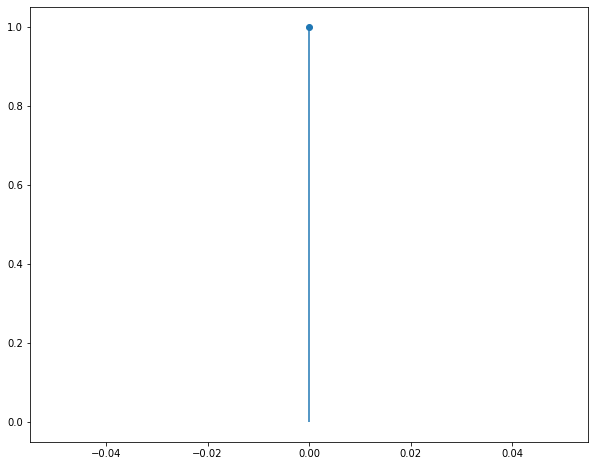

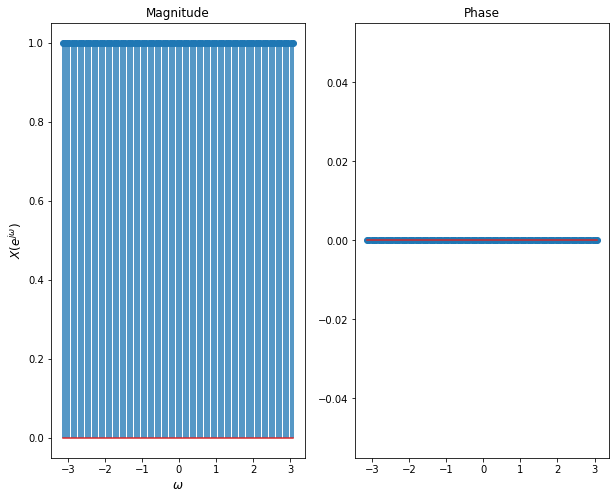

In [40]:
#Question 2

#(a)

q_a = np.array([1])

plt.stem(q_a)

dtft_qa = dtft(q_a)
dtft_plotter(dtft_qa, complex_part=False)

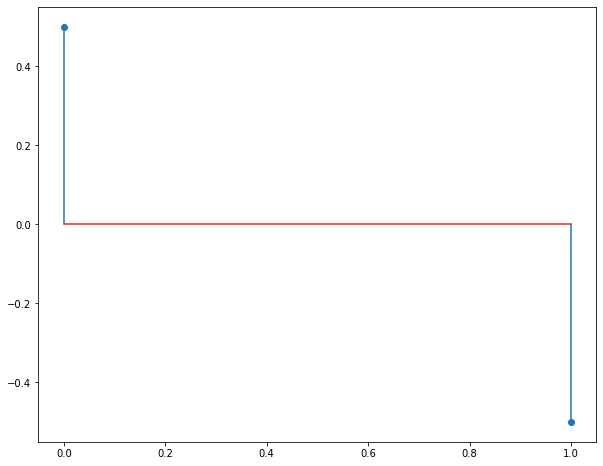

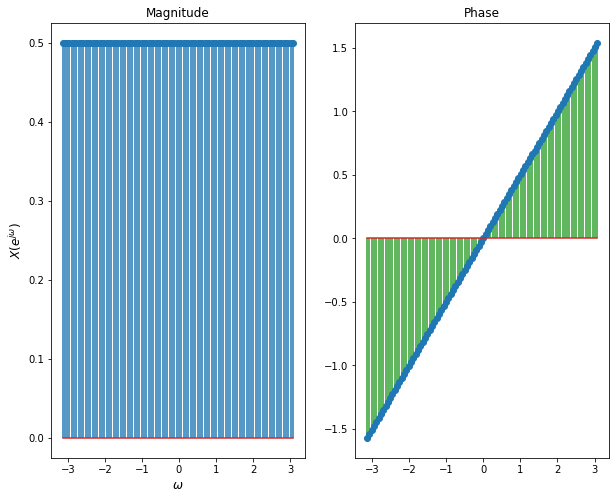

In [41]:
#(b)

q_b = np.array([0.5, -0.5]).reshape(2, 1)

plt.stem(q_b)
dtft_qb = dtft(q_b)
dtft_plotter(dtft_qb, complex_part=False)

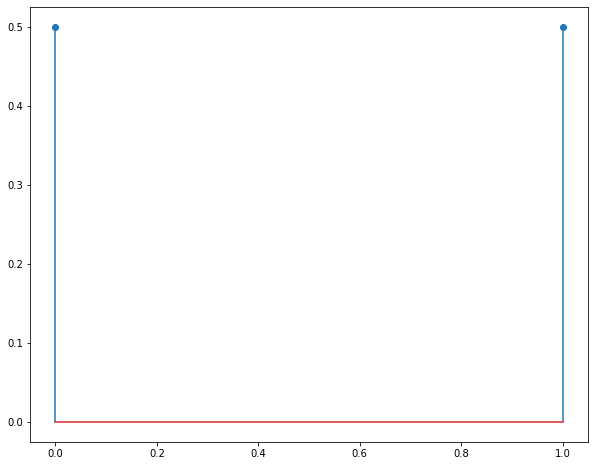

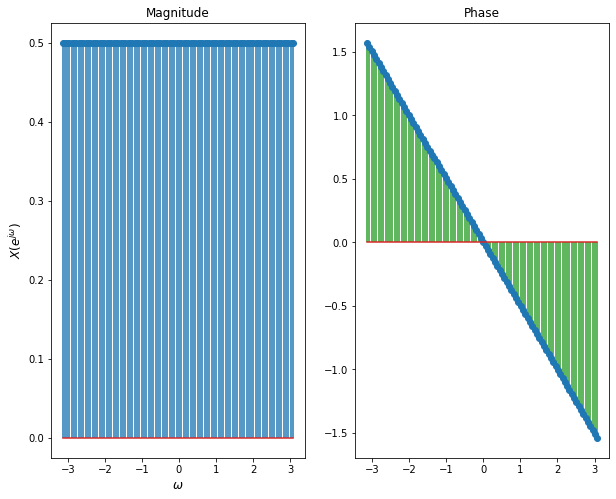

In [42]:
#(c)

q_c = np.array([0.5, 0.5]).reshape(2, 1)

plt.stem(q_c)
dtft_qc = dtft(q_c)
dtft_plotter(dtft_qc, complex_part=False)

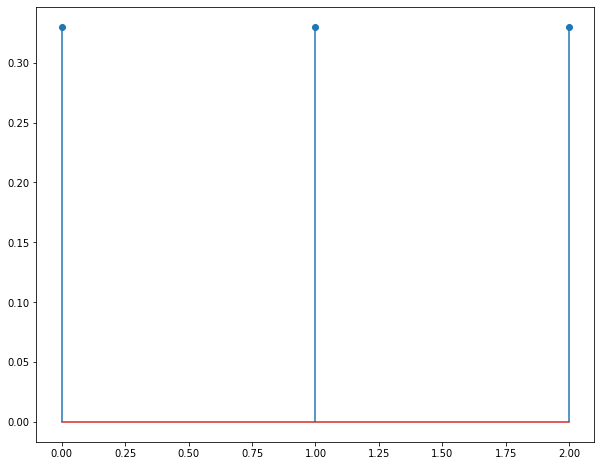

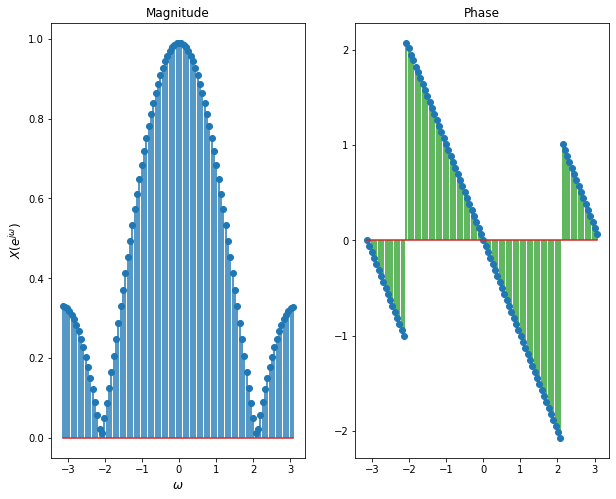

In [43]:
#(d)

q_d = np.array([0.33, 0.33, 0.33]).reshape(3, 1)


plt.stem(q_d)
dtft_qd = dtft(q_d)
dtft_plotter(dtft_qd, complex_part=False)

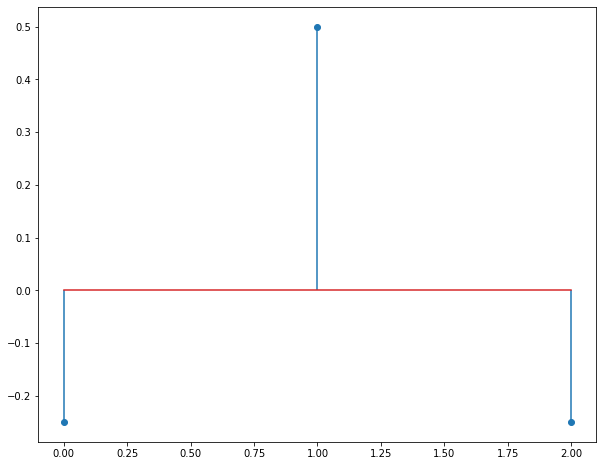

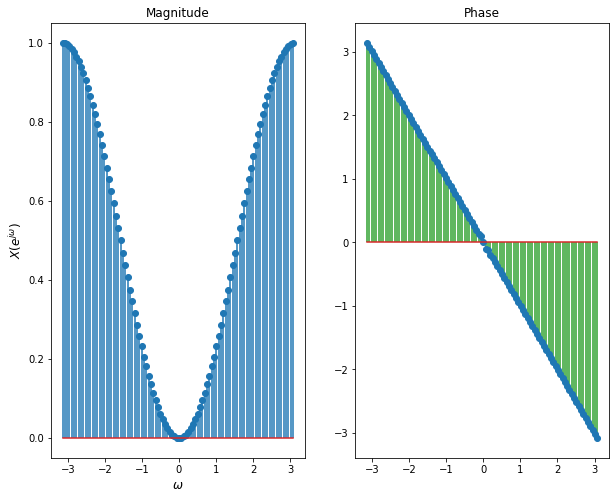

In [44]:
#(e)

q_e = np.array([-0.25, 0.5, -0.25]).reshape(3, 1)

plt.stem(q_e)
dtft_qe = dtft(q_e)
dtft_plotter(dtft_qe, complex_part=False)

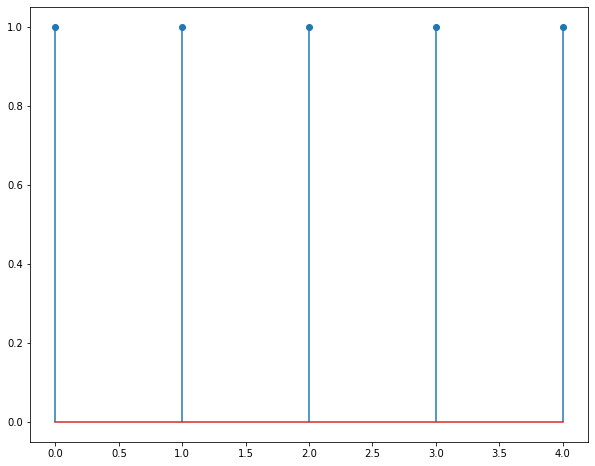

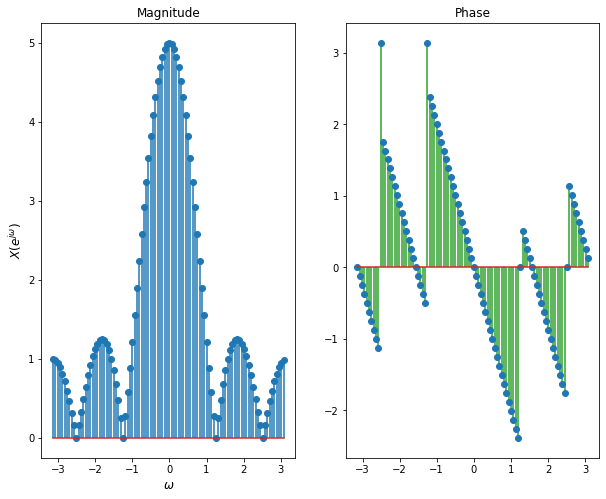

In [45]:
#(f)

q_f = np.ones((5, 1))

plt.stem(q_f)
dtft_qf = dtft(q_f)
dtft_plotter(dtft_qf, complex_part=False)

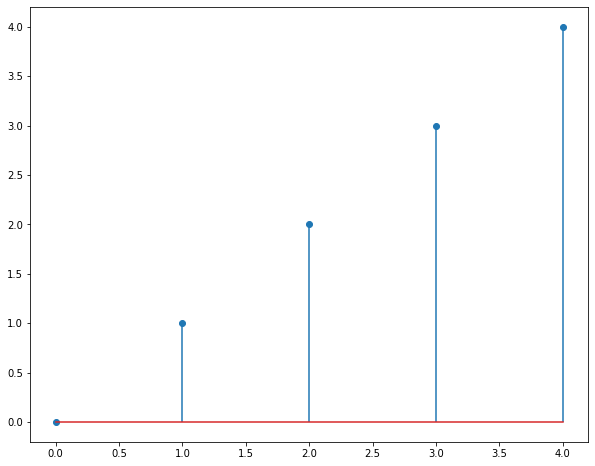

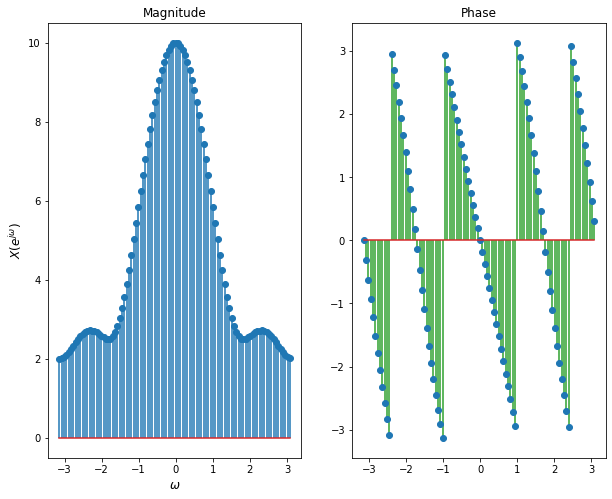

In [46]:
#(g)

q_g = np.arange(5).reshape(5, 1)

plt.stem(q_g)
dtft_qg = dtft(q_g)
dtft_plotter(dtft_qg, complex_part=False)

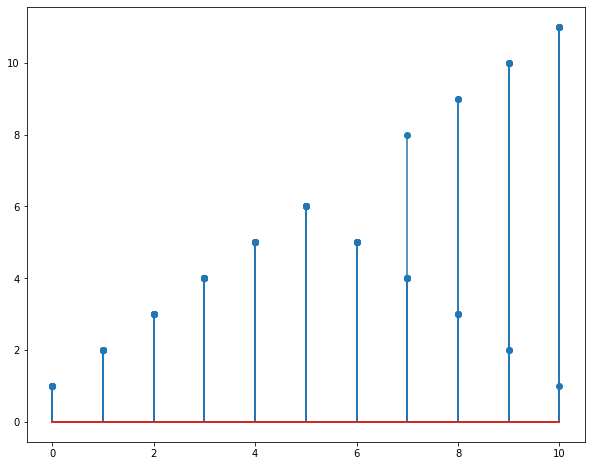

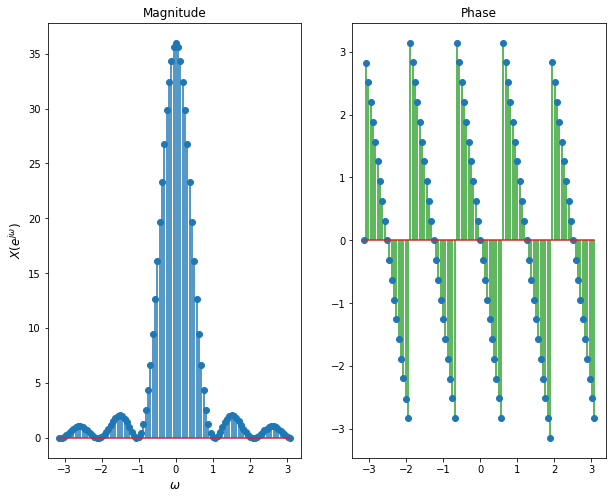

In [47]:
#(h)

q_h = np.arange(11)+1
for i in range(6, 11):
    q_h[i] = 12 - q_h[i]

    plt.stem(q_h)
dtft_qh = dtft(q_h)
dtft_plotter(dtft_qh, complex_part=False)

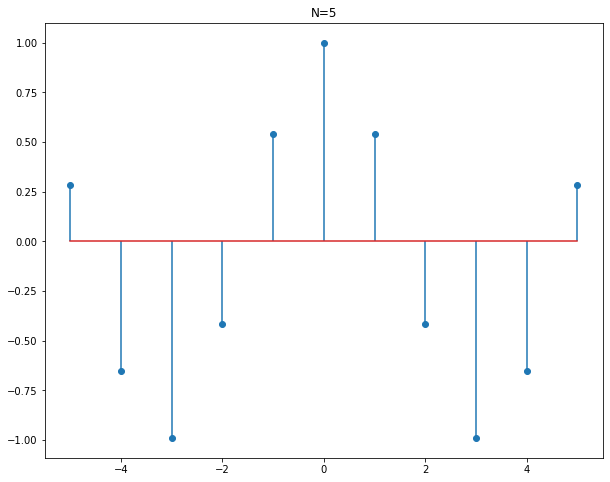

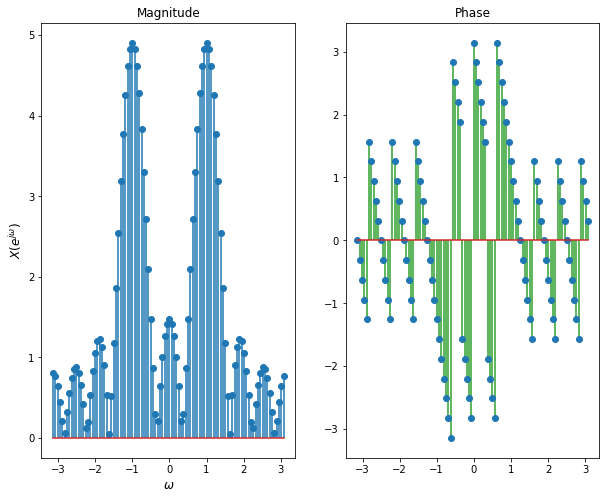

In [48]:
#(i)1

N = 5

n= np.linspace(-1*N, N, 2*N+1)
q_i_1 = np.cos(n)

plt.stem(n, q_i_1)
plt.title('N=5')
dtft_qi1 = dtft(q_i_1)
dtft_plotter(dtft_qi1, complex_part=False)

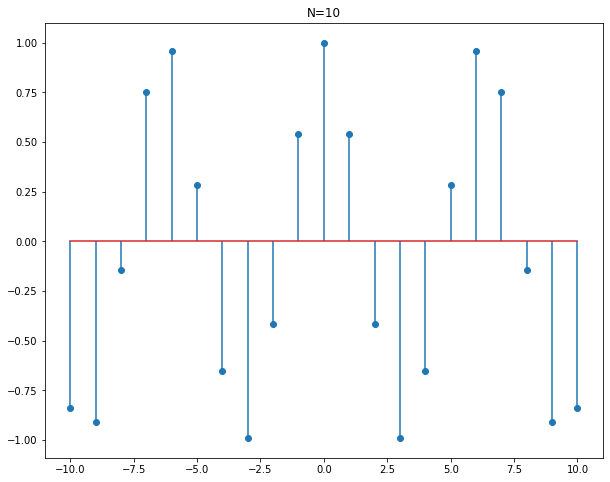

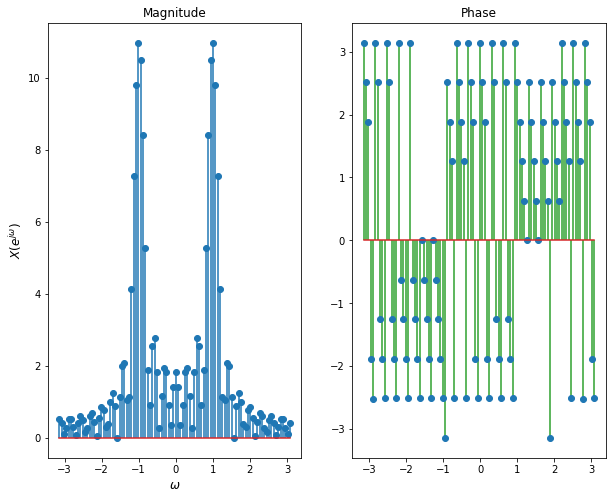

In [49]:
#(i)2

N = 10

n= np.linspace(-1*N, N, 2*N+1)
q_i_2 = np.cos(n)

plt.stem(n, q_i_2)
plt.title('N=10')
dtft_qi2 = dtft(q_i_2)
dtft_plotter(dtft_qi2, complex_part=False)

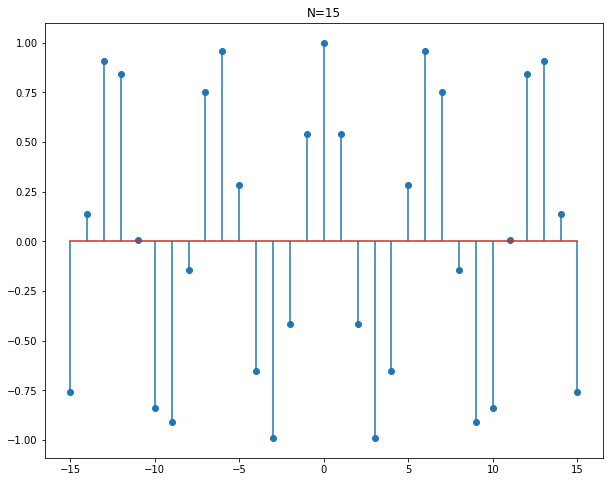

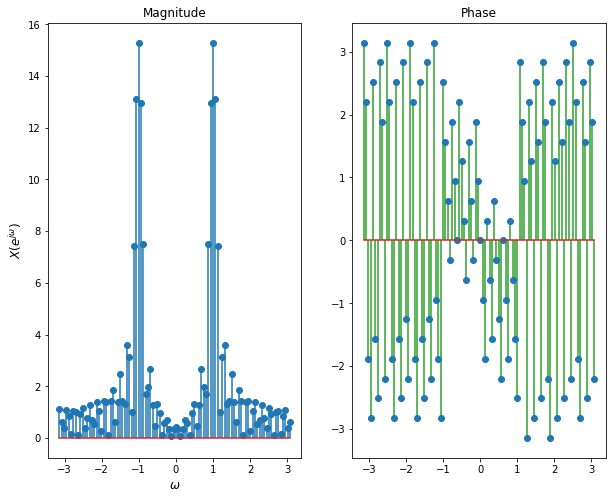

In [50]:
#(i)3


N = 15

n= np.linspace(-1*N, N, 2*N+1)
q_i_3 = np.cos(n)

plt.stem(n, q_i_3)
plt.title('N=15')
dtft_qi3 = dtft(q_i_3)
dtft_plotter(dtft_qi3, complex_part=False)

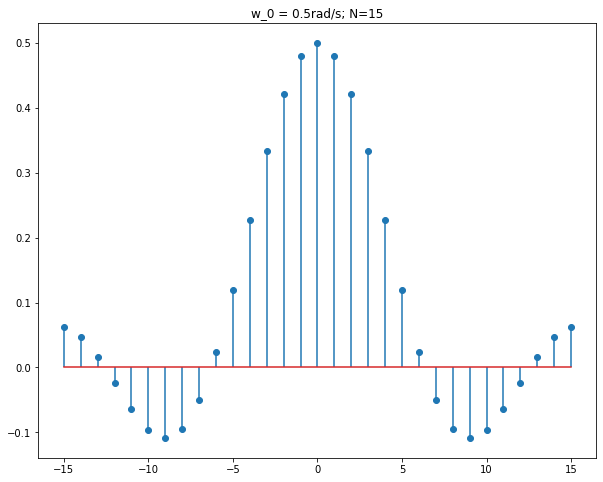

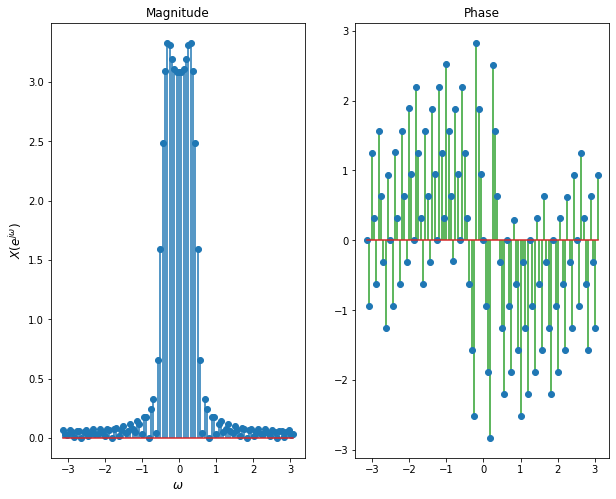

In [51]:
#(j)1


w_0 = 0.5
M = 15

n= np.linspace(-1*M, M, 2*M+1)
q_j_1 = w_0*np.sinc(w_0*n/np.pi)

plt.stem(n, q_j_1)
plt.title('w_0 = 0.5rad/s; N=15')
dtft_qj1 = dtft(q_j_1)
dtft_plotter(dtft_qj1, complex_part=False)

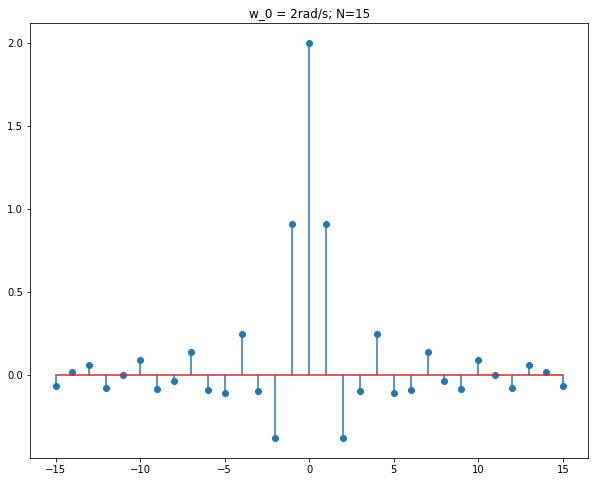

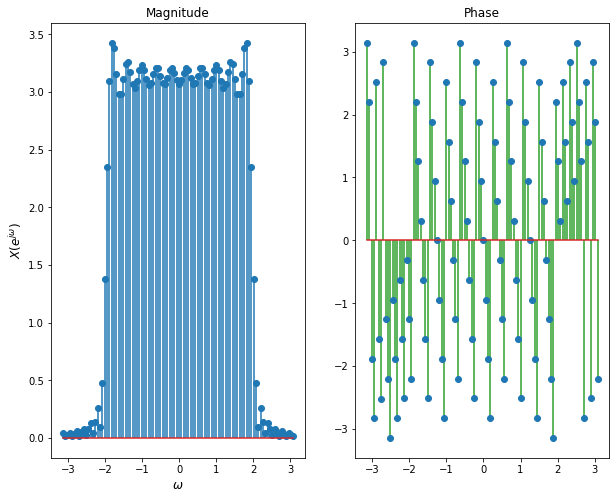

In [52]:
#(j)2


w_0 = 2
M = 15

n= np.linspace(-1*M, M, 2*M+1)
q_j_2 = w_0*np.sinc(w_0*n/np.pi)

plt.stem(n, q_j_2)
plt.title('w_0 = 2rad/s; N=15')
dtft_qj2 = dtft(q_j_2)
dtft_plotter(dtft_qj2, complex_part=False)

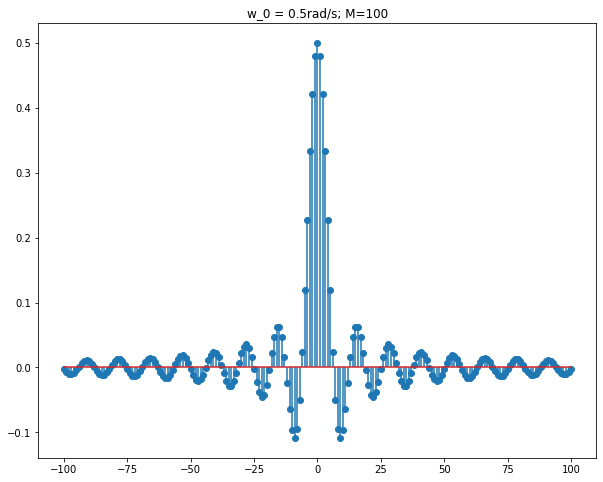

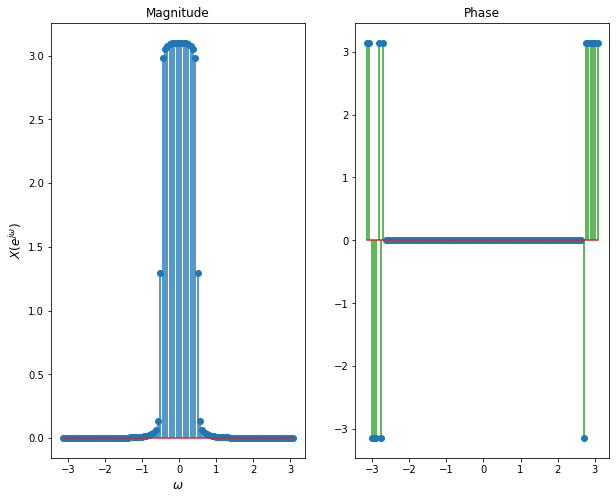

In [53]:
#(j)3


w_0 = 0.5
M = 100

n= np.linspace(-1*M, M, 2*M+1)
q_j_3 = w_0*np.sinc(w_0*n/np.pi)

plt.stem(n, q_j_3)
plt.title('w_0 = 0.5rad/s; M=100')
dtft_qj3 = dtft(q_j_3)
dtft_plotter(dtft_qj3, complex_part=False)

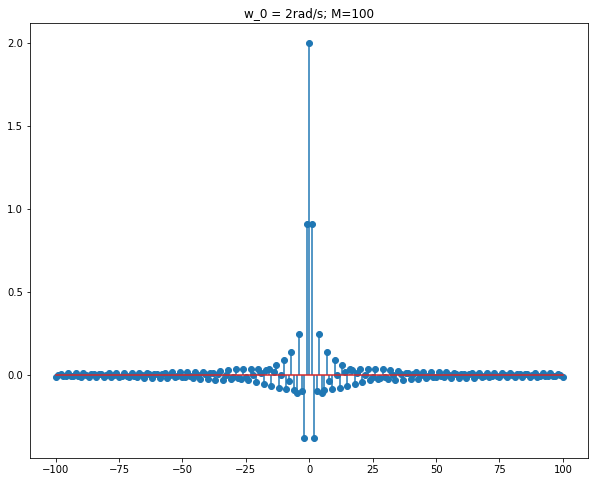

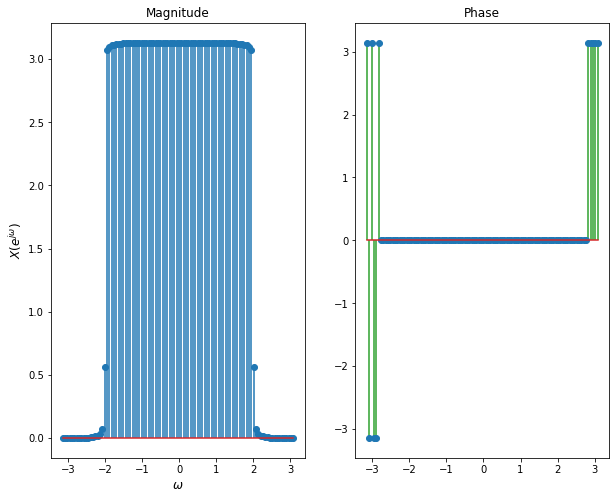

In [54]:
#(j)4


w_0 = 2
M = 100

n= np.linspace(-1*M, M, 2*M+1)
q_j_4 = w_0*np.sinc(w_0*n/np.pi)

plt.stem(n, q_j_4)
plt.title('w_0 = 2rad/s; M=100')
dtft_qj4 = dtft(q_j_4)
dtft_plotter(dtft_qj4, complex_part=False)

(5397,) (1,)


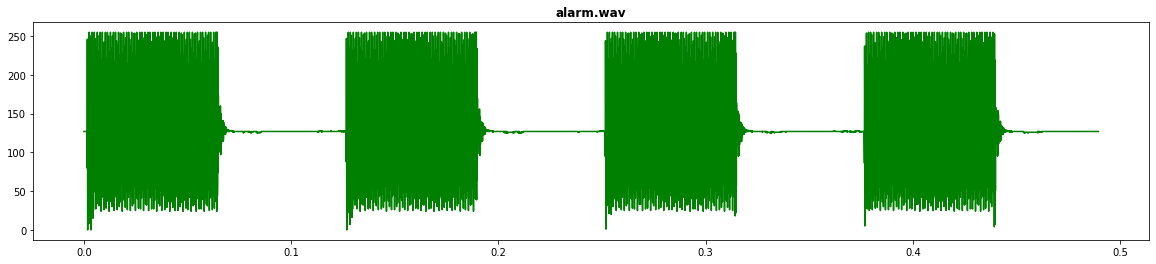

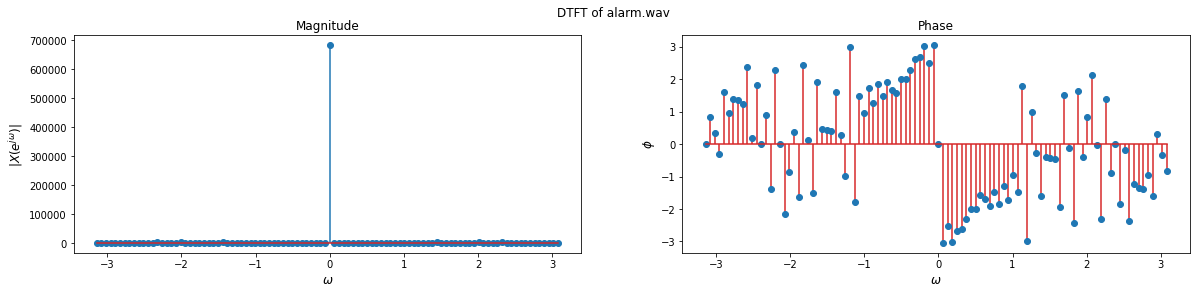

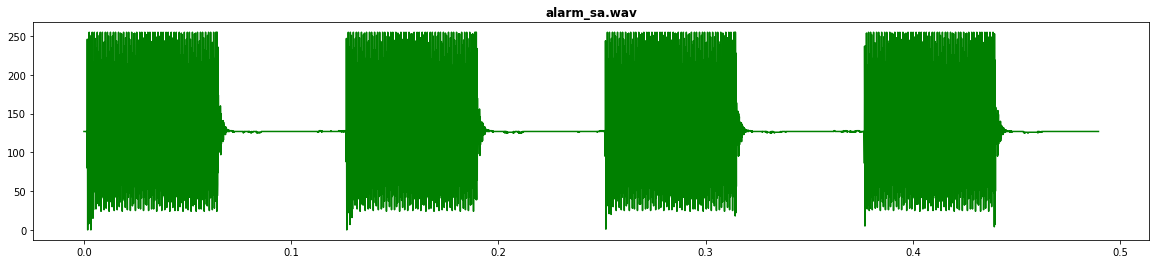

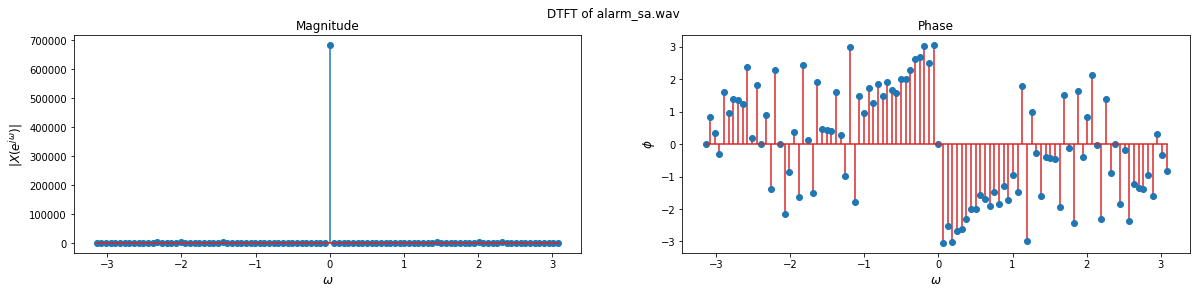

In [58]:
#System a

#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, q_a, normalisation=False, o=file[:-4] + "_sa.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (2, 1)


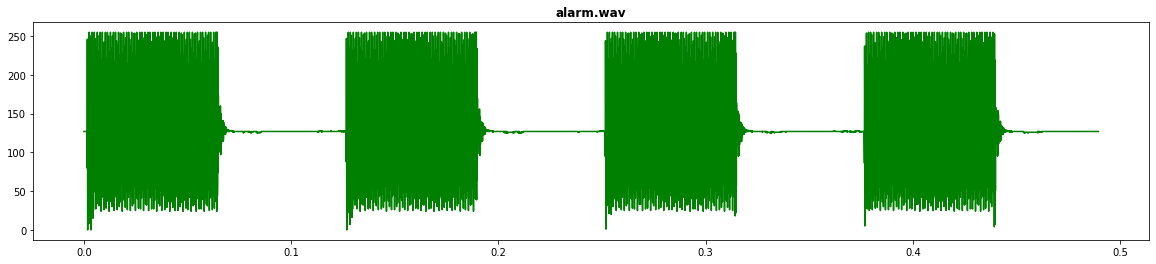

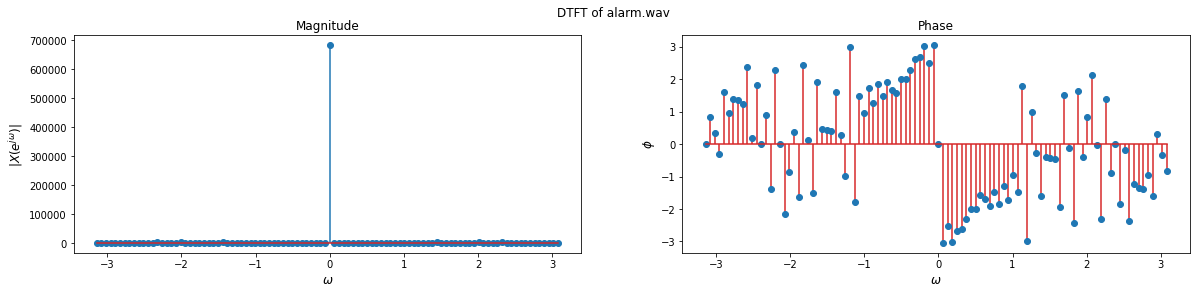

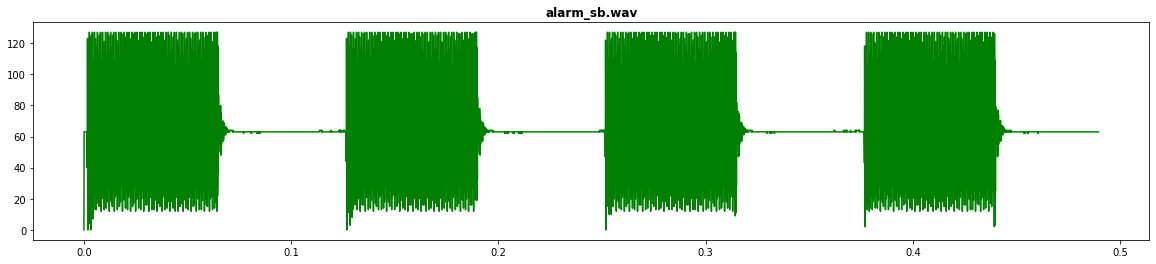

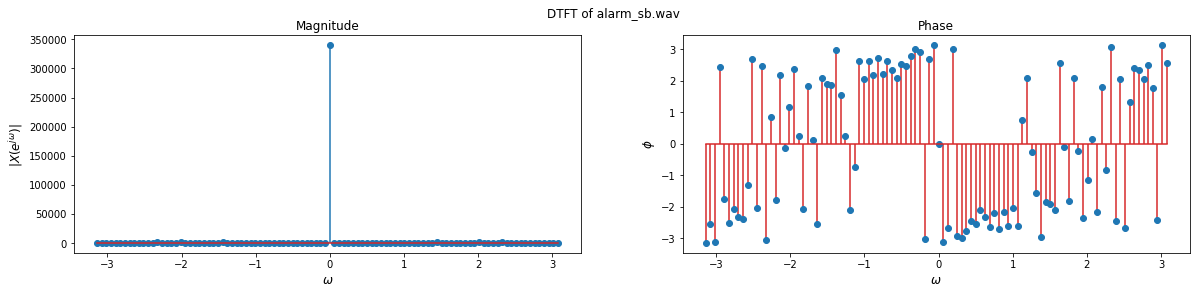

In [61]:
#System b

#Getting the convolved wave file
op = audio_convolve(file, q_b, normalisation=False, o=file[:-4] + "_sb.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (2, 1)


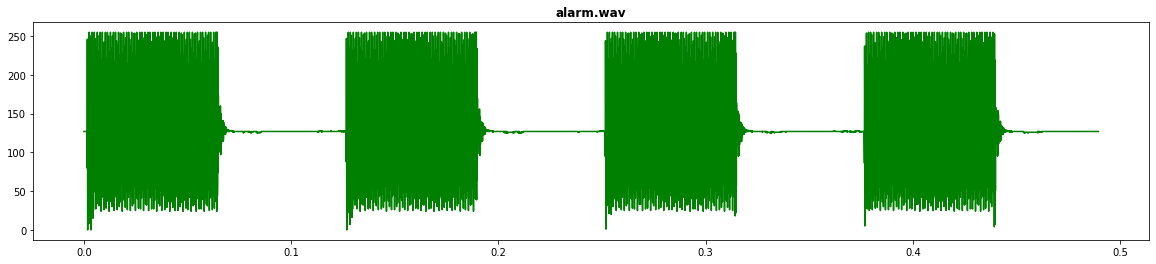

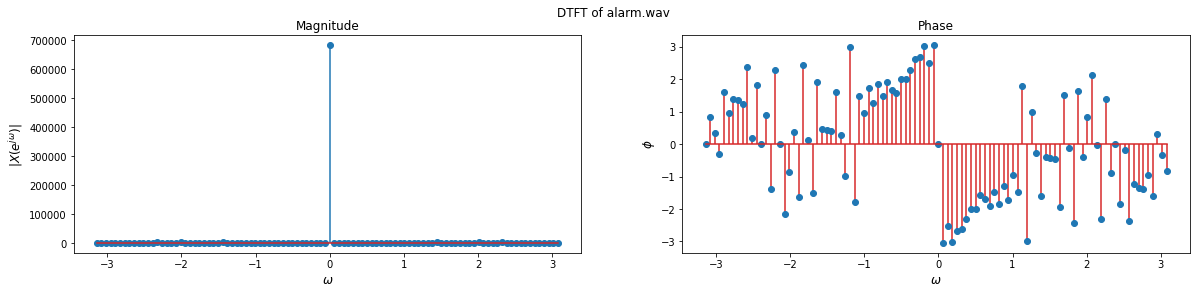

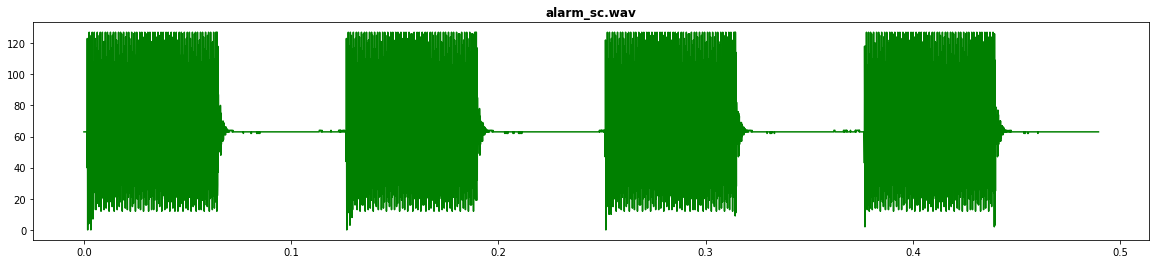

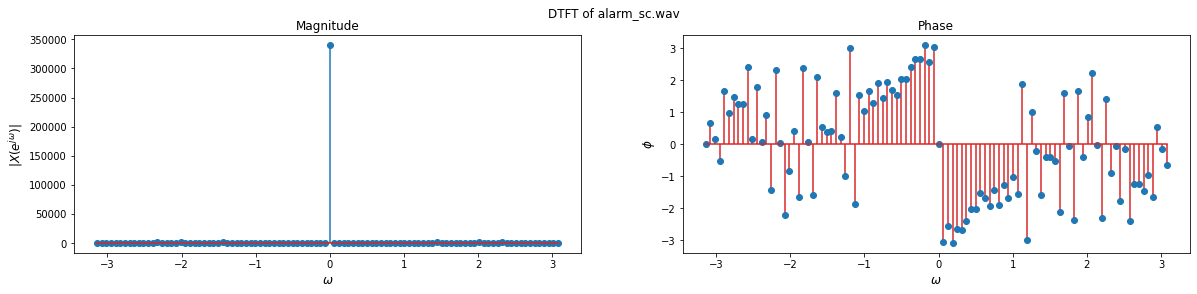

In [62]:
#System c

#Getting the convolved wave file
op = audio_convolve(file, q_c, normalisation=False, o=file[:-4] + "_sc.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (3, 1)


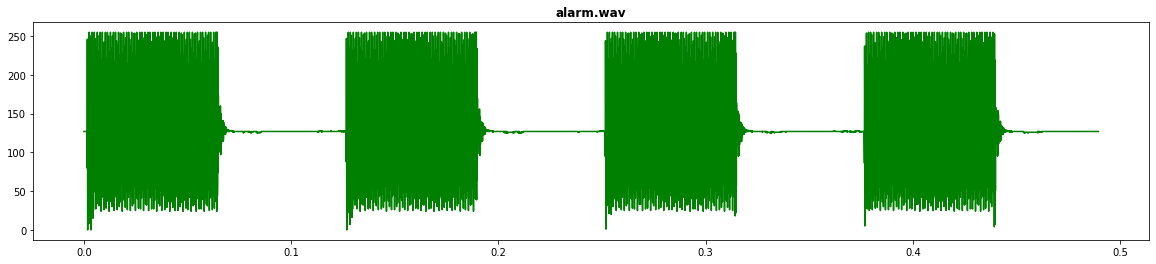

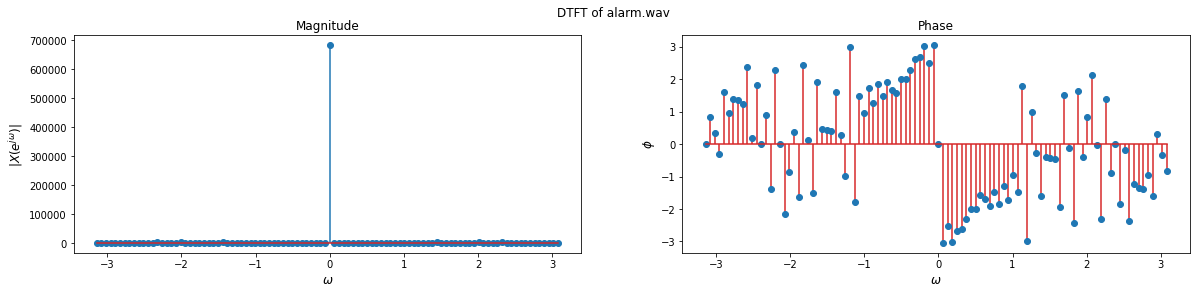

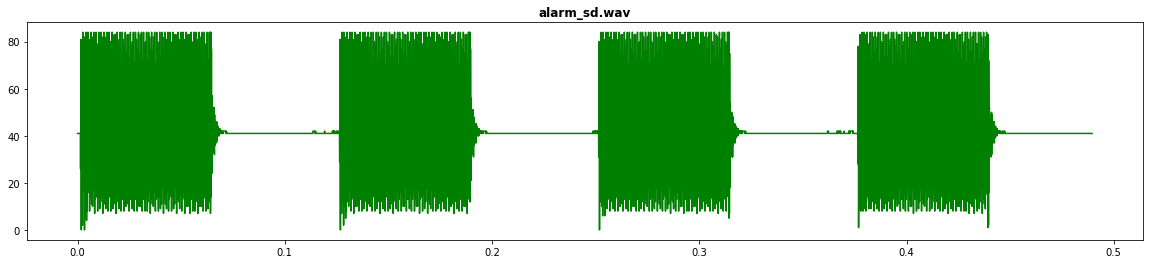

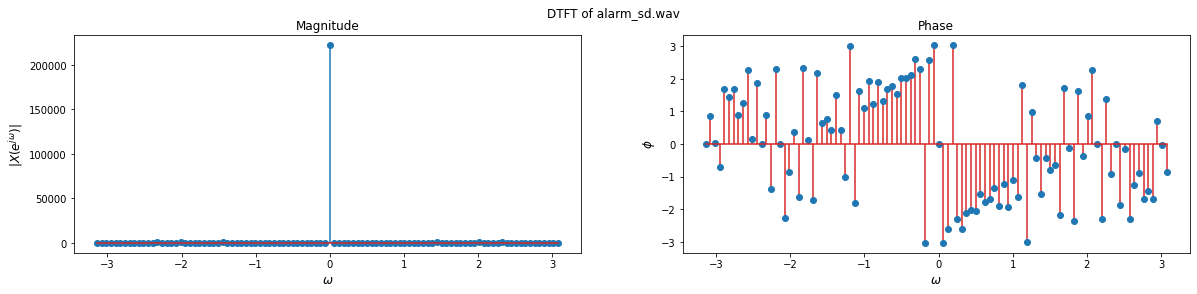

In [63]:
#System d

#Getting the convolved wave file
op = audio_convolve(file, q_d, normalisation=False, o=file[:-4] + "_sd.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (3, 1)


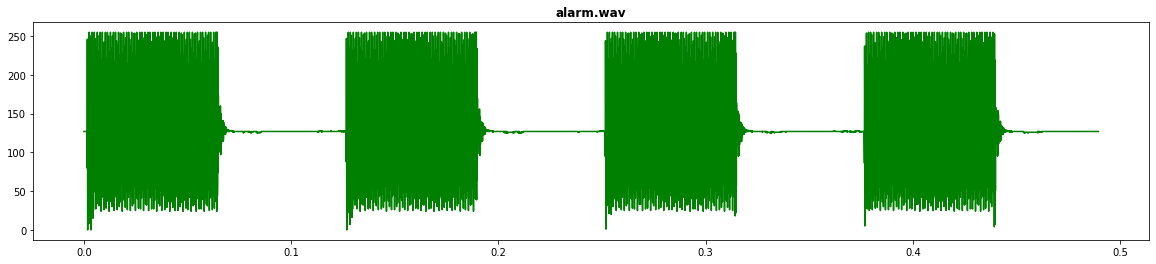

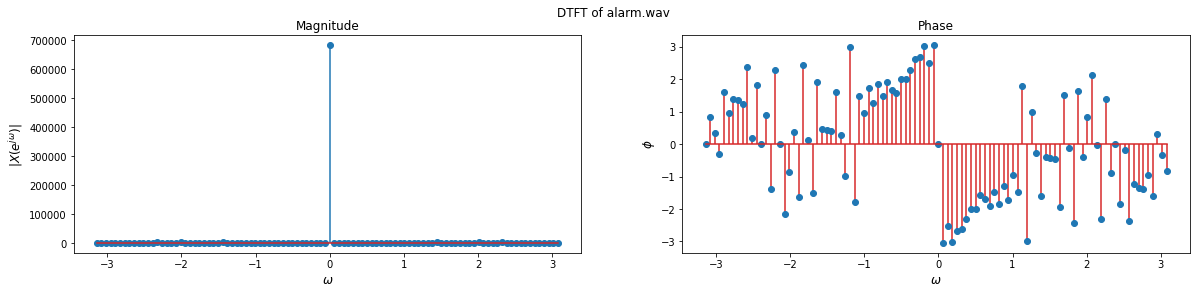

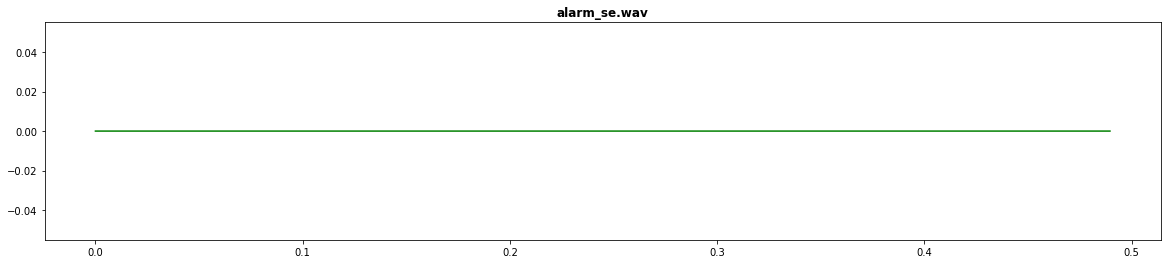

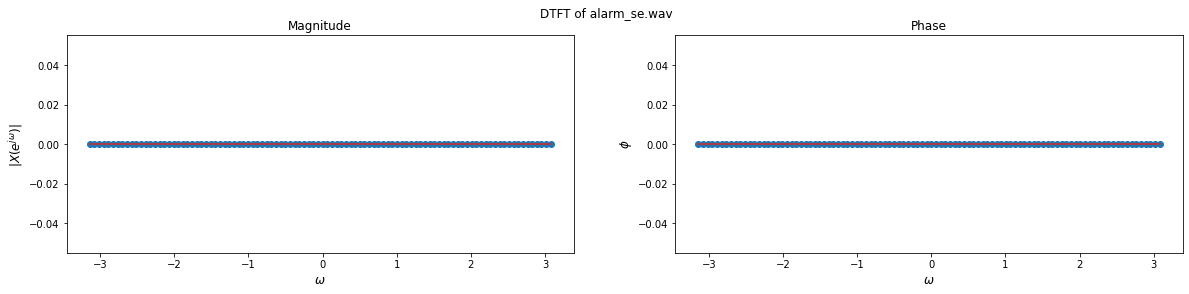

In [64]:
#System e


#Getting the convolved wave file
op = audio_convolve(file, q_e, normalisation=False, o=file[:-4] + "_se.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (5, 1)


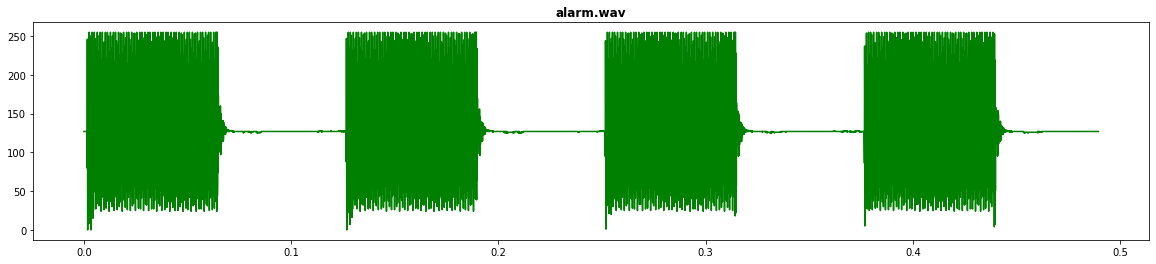

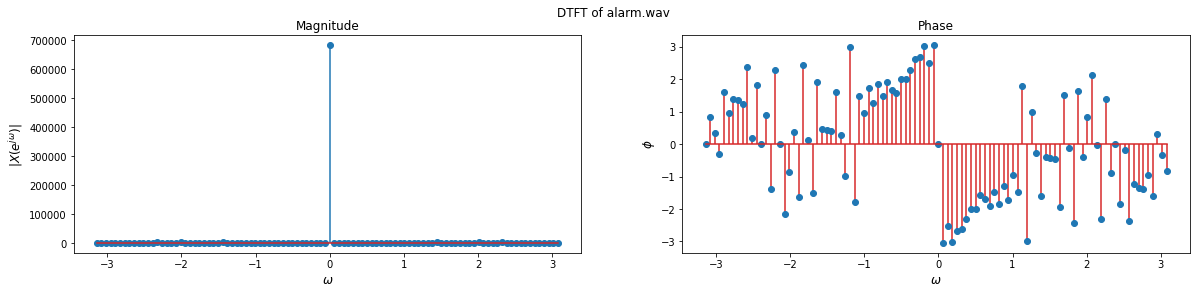

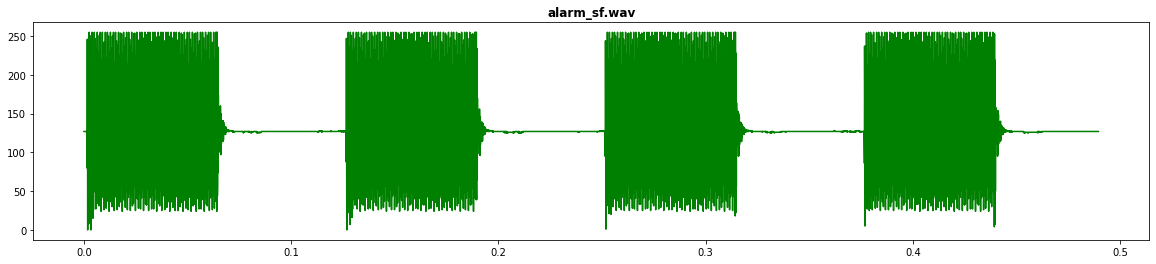

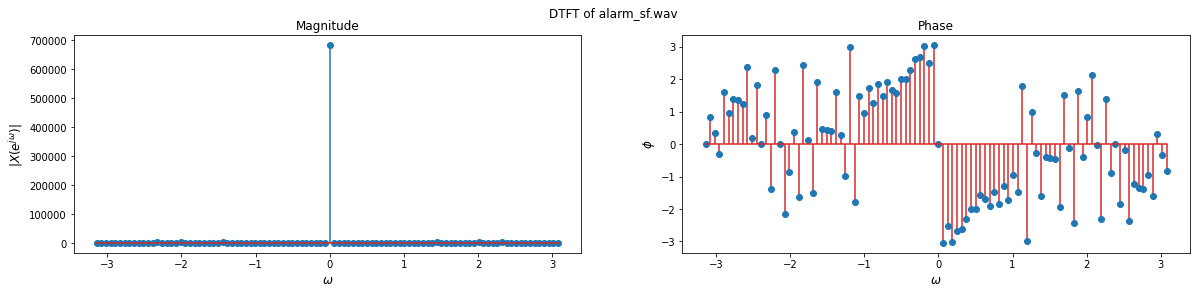

In [65]:
#System f

#Getting the convolved wave file
op = audio_convolve(file, q_f, normalisation=False, o=file[:-4] + "_sf.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (5, 1)


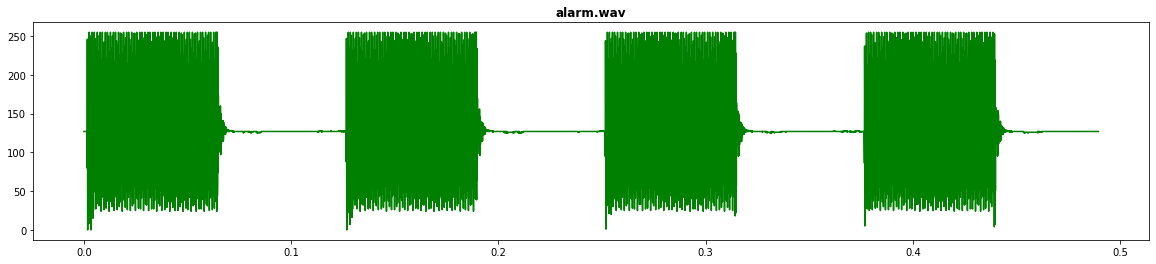

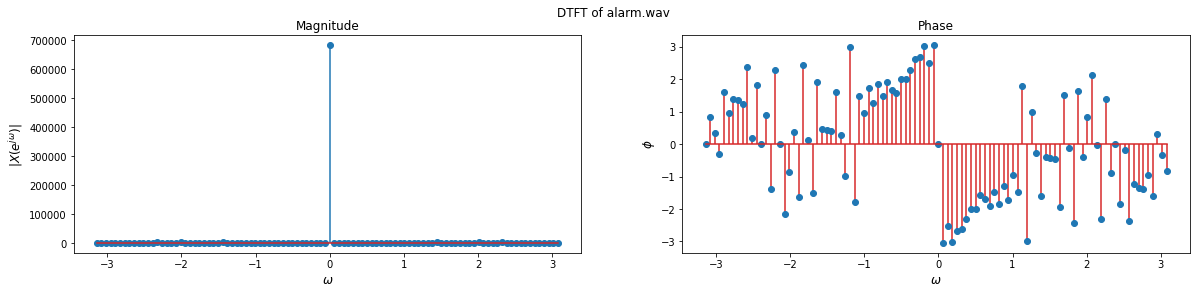

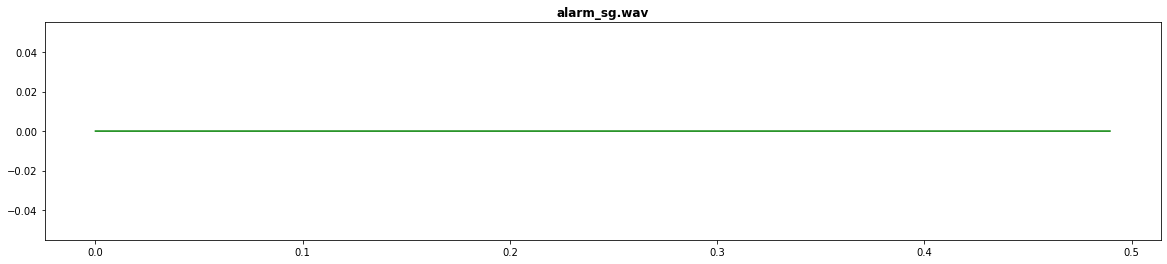

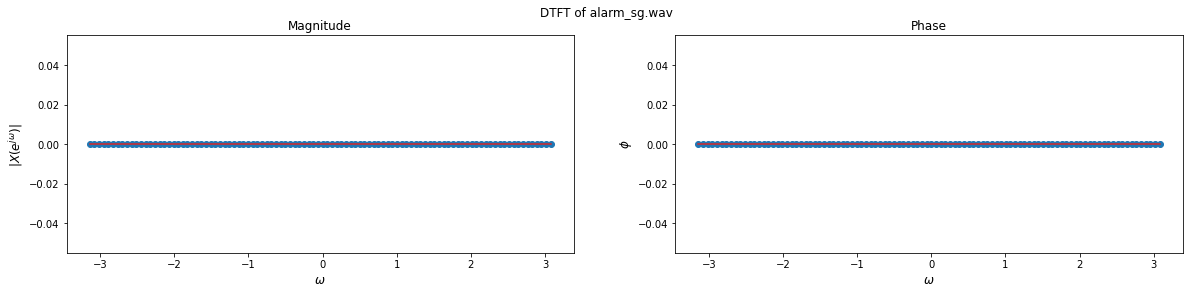

In [66]:
#System g

#Getting the convolved wave file
op = audio_convolve(file, q_g, normalisation=False, o=file[:-4] + "_sg.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (11,)


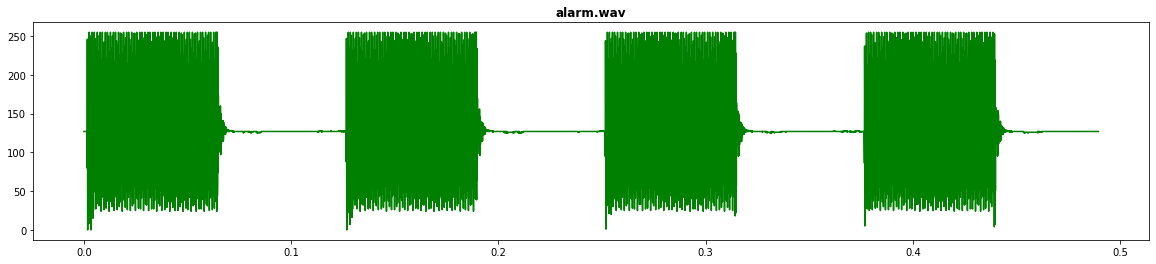

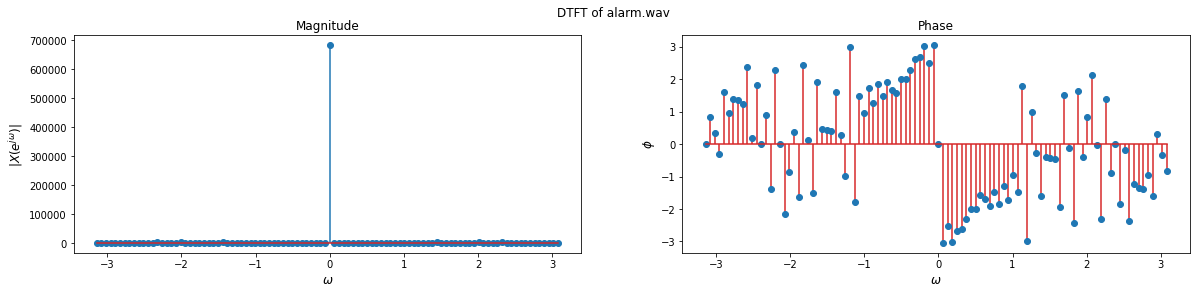

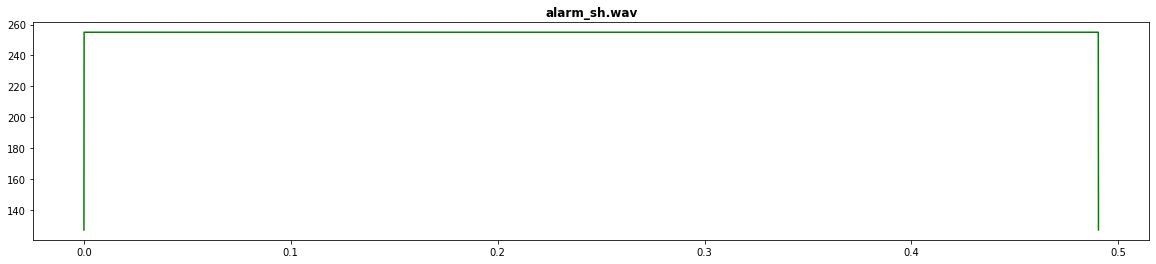

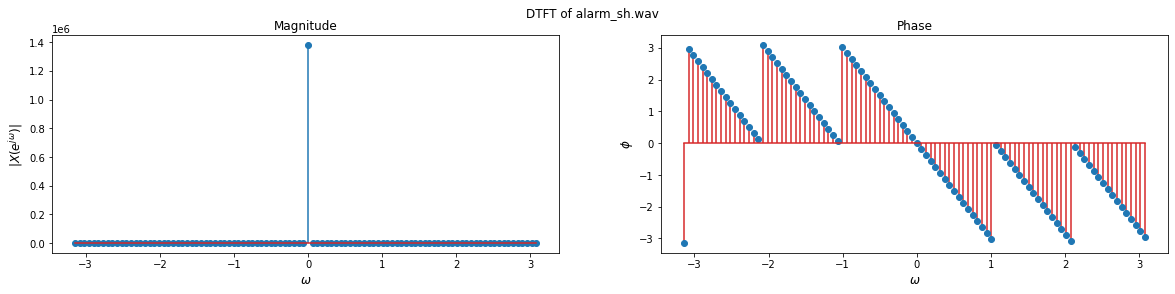

In [67]:
#System h

#Getting the convolved wave file
op = audio_convolve(file, q_h, normalisation=False, o=file[:-4] + "_sh.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (11,)


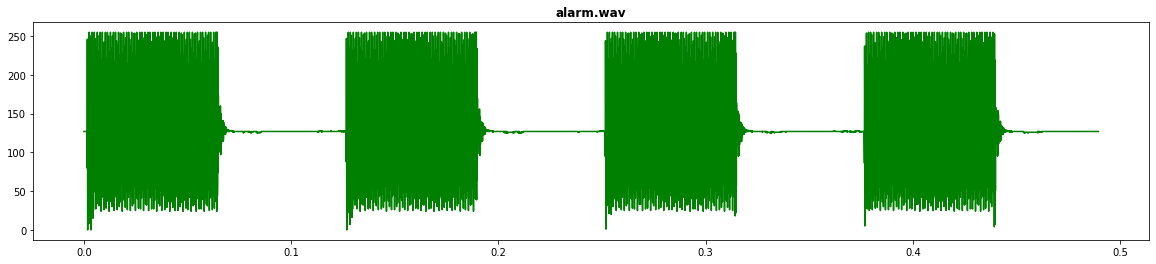

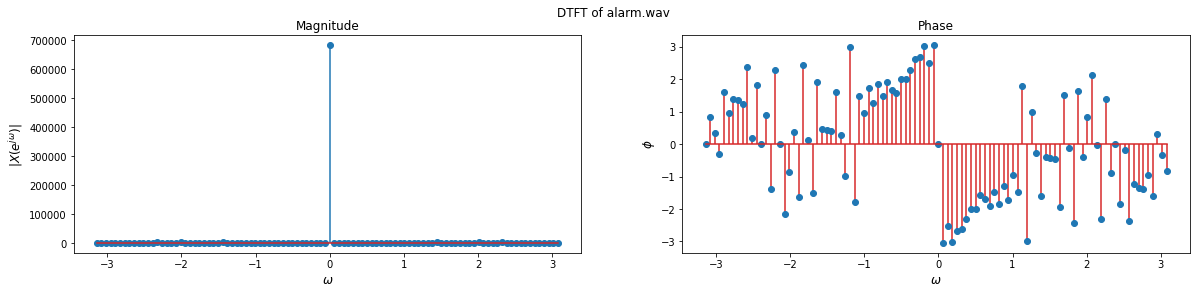

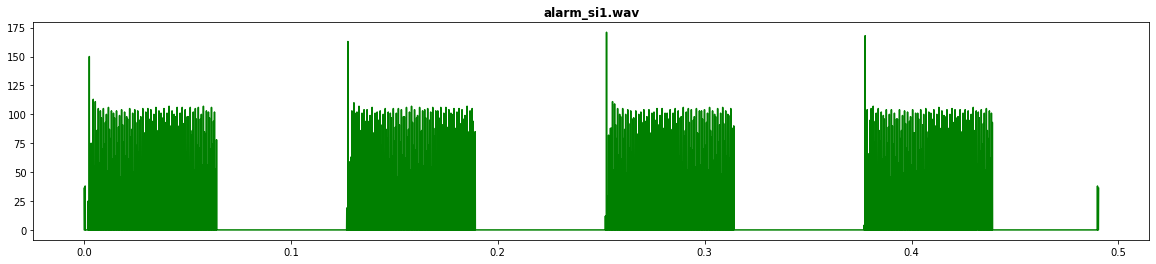

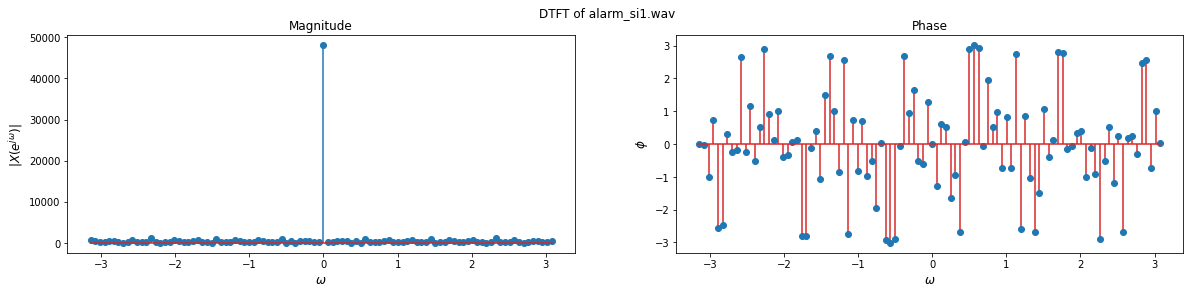

In [68]:
#System i1


#Getting the convolved wave file
op = audio_convolve(file, q_i_1, normalisation=False, o=file[:-4] + "_si1.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (21,)


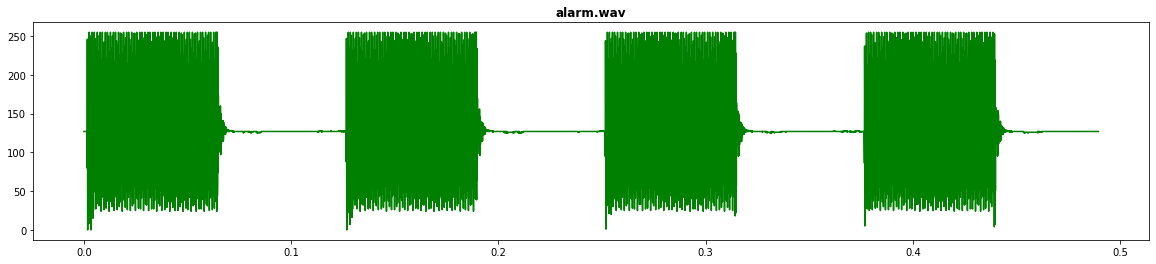

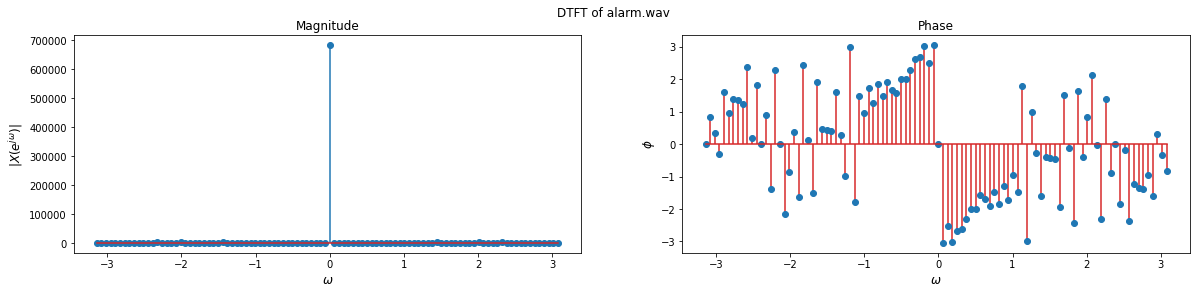

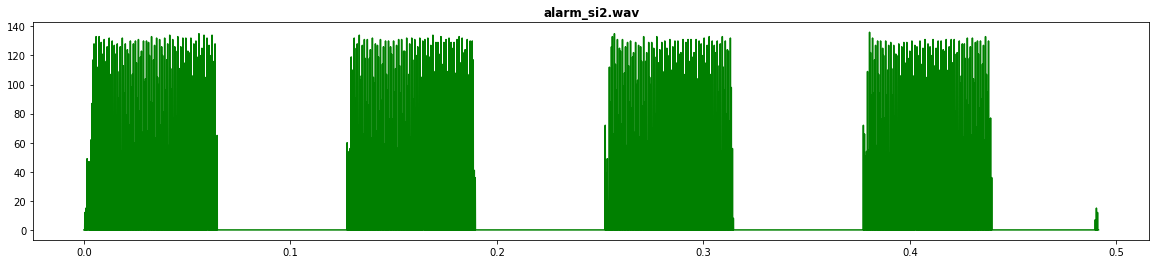

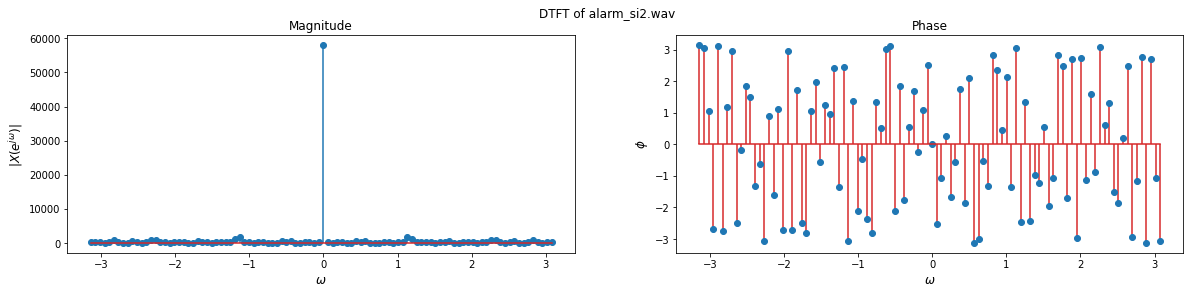

In [69]:
#System i2


#Getting the convolved wave file
op = audio_convolve(file, q_i_2, normalisation=False, o=file[:-4] + "_si2.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (31,)


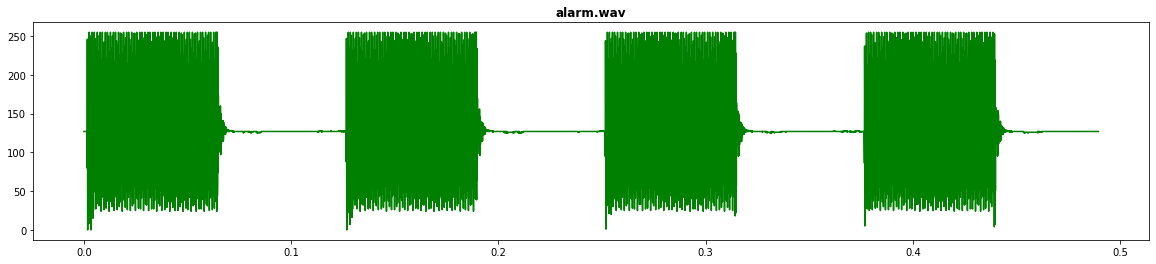

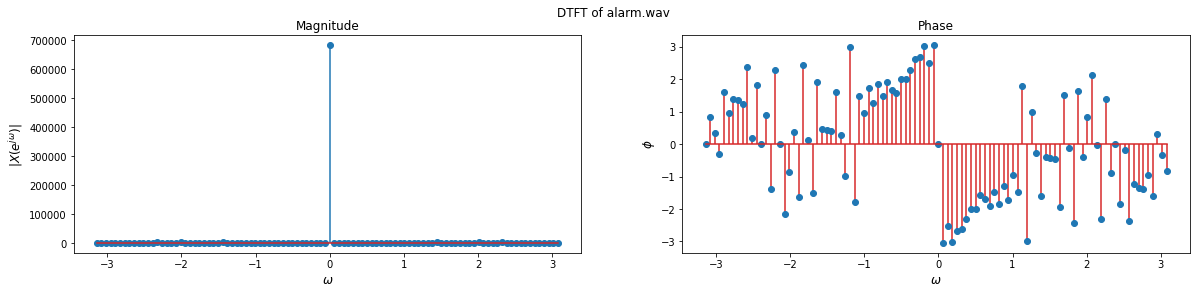

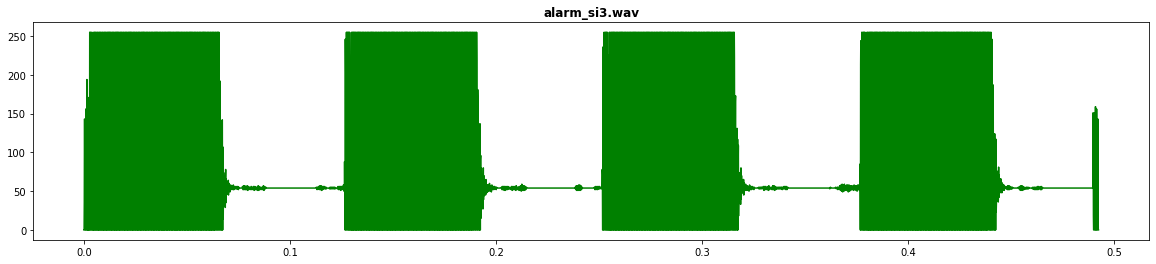

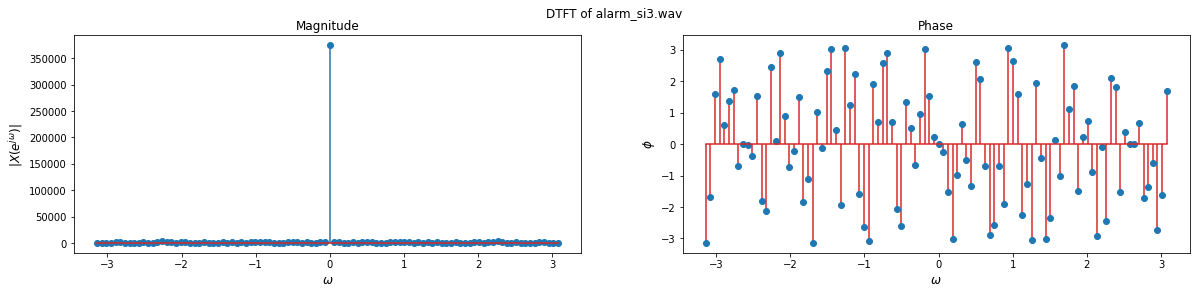

In [70]:
#System i3


#Getting the convolved wave file
op = audio_convolve(file, q_i_3, normalisation=False, o=file[:-4] + "_si3.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (31,)


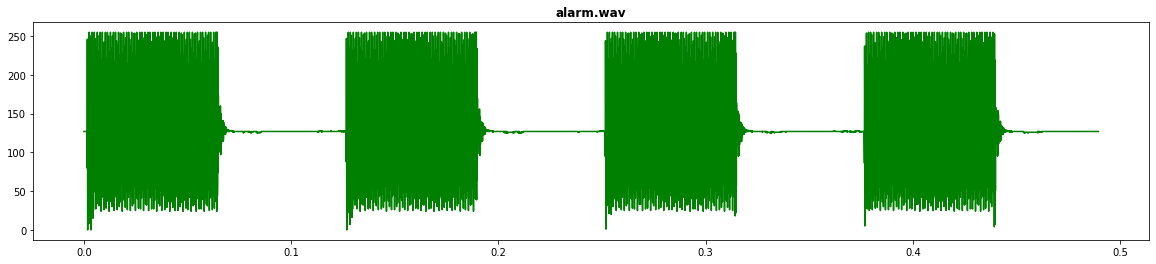

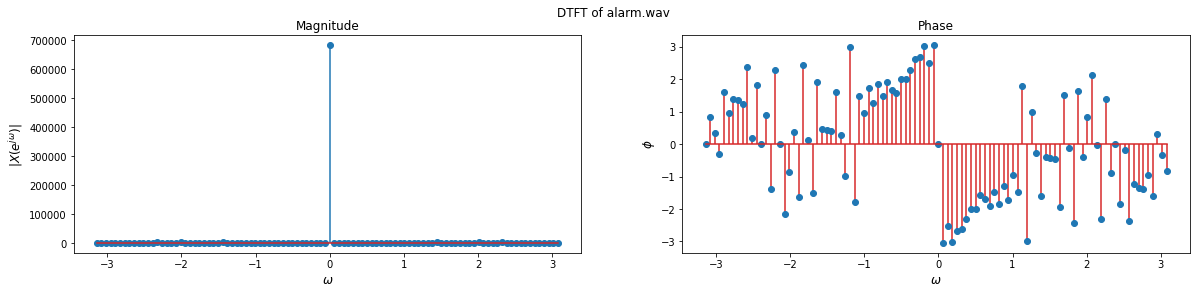

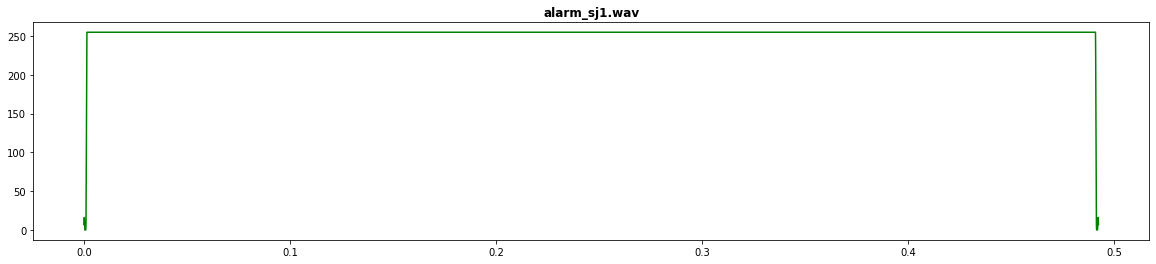

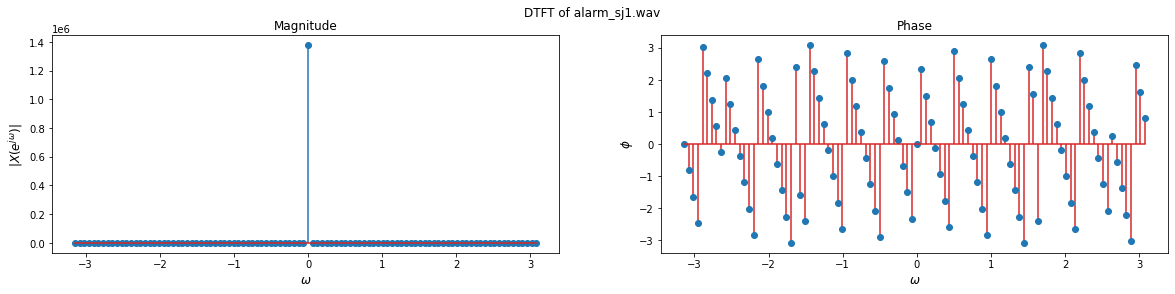

In [71]:
#System j1


#Getting the convolved wave file
op = audio_convolve(file, q_j_1, normalisation=False, o=file[:-4] + "_sj1.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (31,)


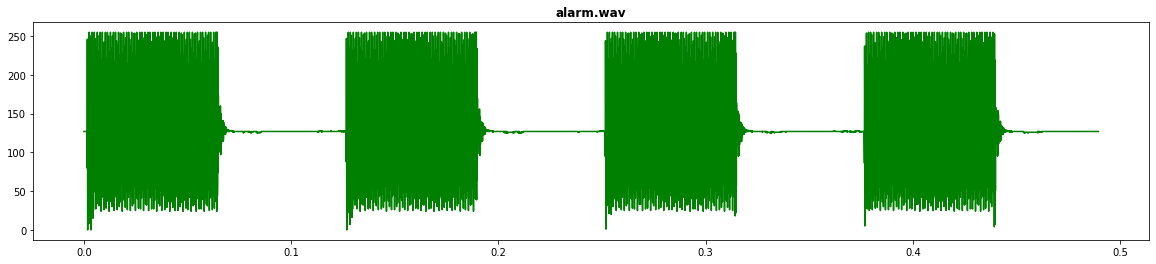

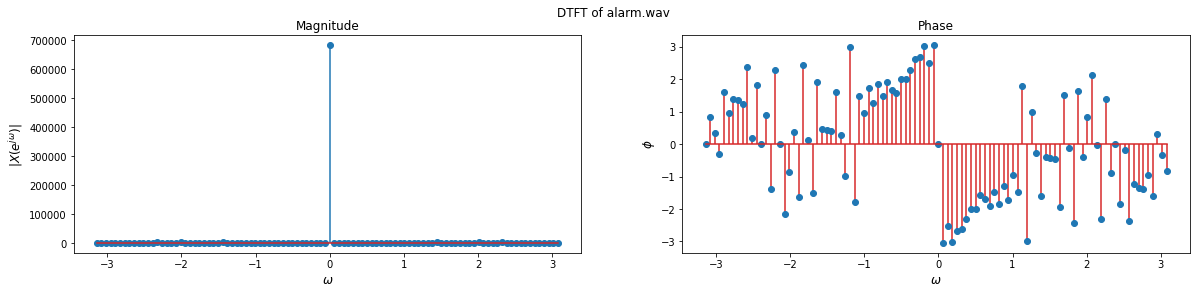

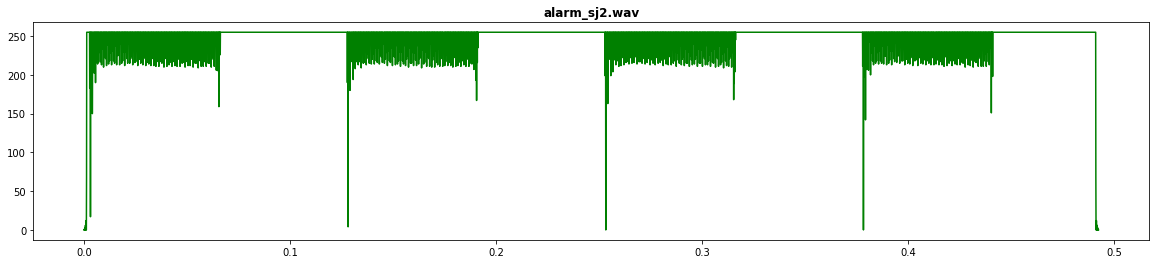

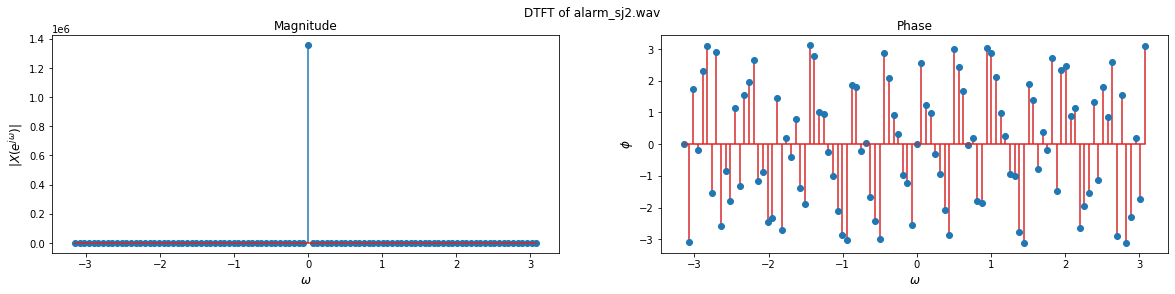

In [72]:
#System j2


#Getting the convolved wave file
op = audio_convolve(file, q_j_2, normalisation=False, o=file[:-4] + "_sj2.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (201,)


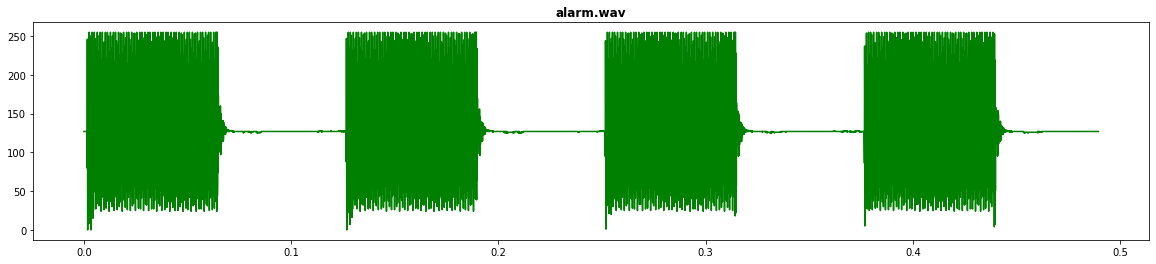

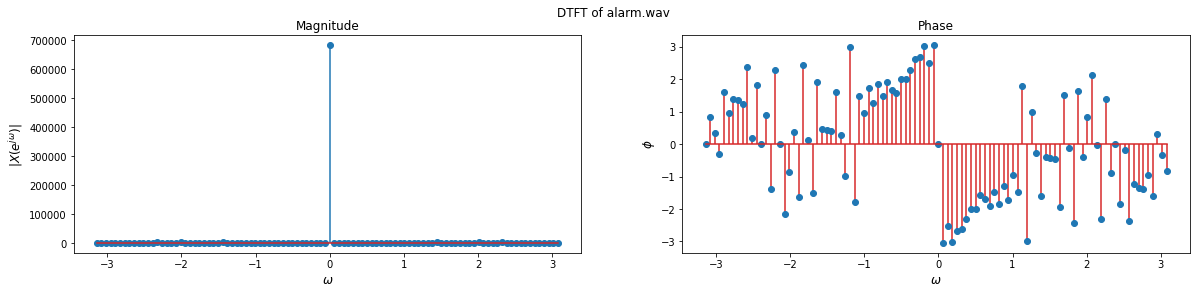

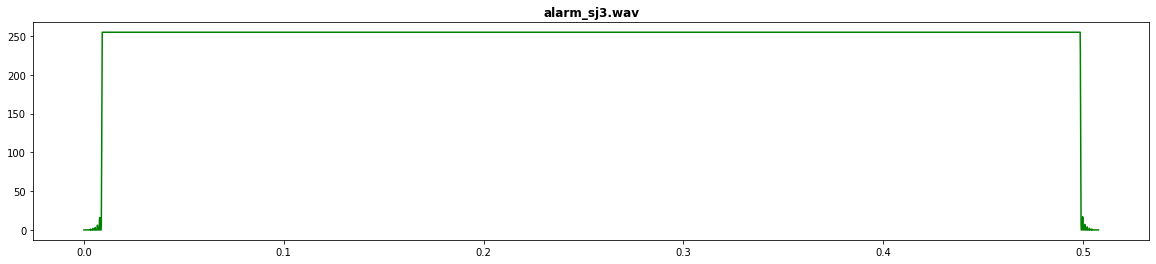

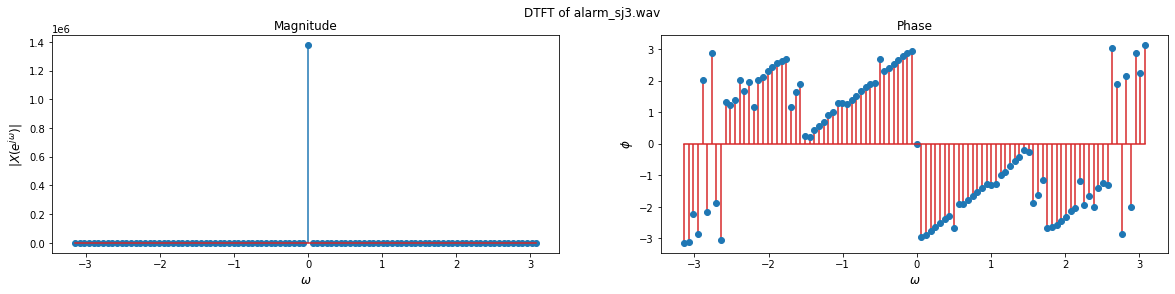

In [73]:
#System j3


#Getting the convolved wave file
op = audio_convolve(file, q_j_3, normalisation=False, o=file[:-4] + "_sj3.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

(5397,) (201,)


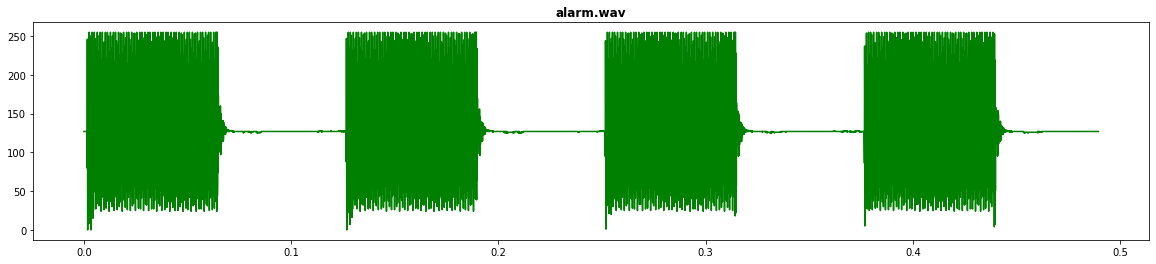

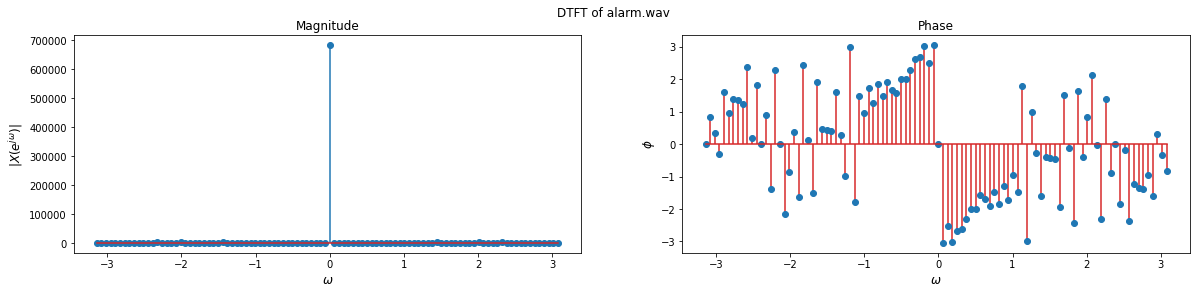

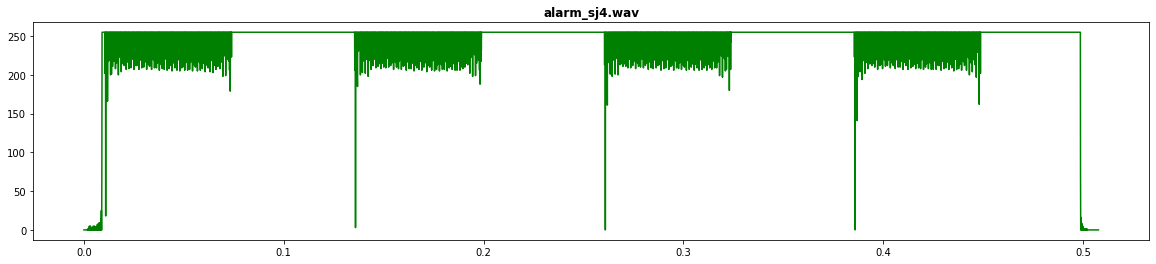

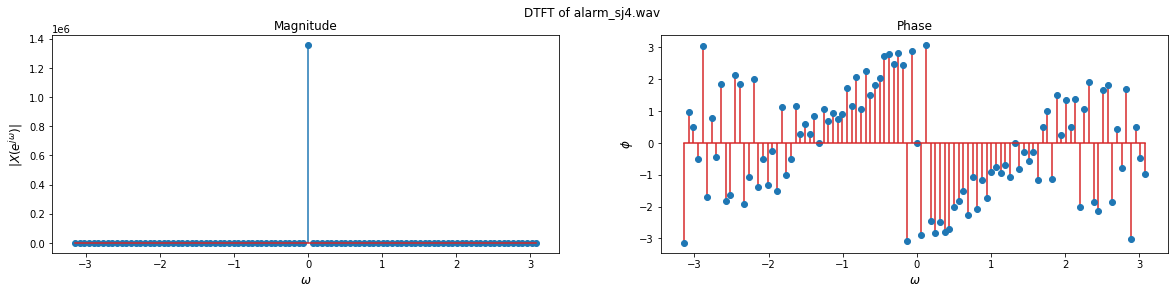

In [74]:
#System j4


#Getting the convolved wave file
op = audio_convolve(file, q_j_4, normalisation=False, o=file[:-4] + "_sj4.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile